<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/usa_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Prediction des prix de vente des maisons dans les regions americaines

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/USA_Housing.csv')

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
# voir les correlations qui existent entre  ces features

df.corr()['Price']

<ipython-input-42-8c8faaebcd61>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Area Population                 0.408556
Price                           1.000000
Name: Price, dtype: float64

In [ ]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

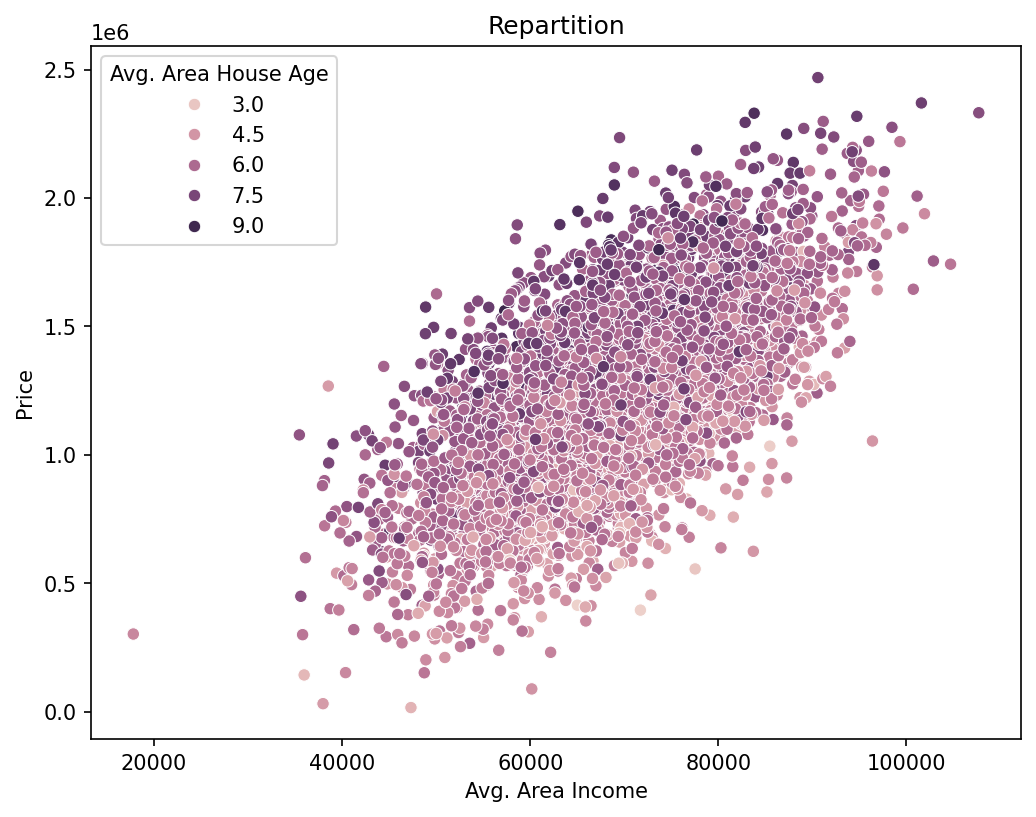

In [ ]:
# visualisation
plt.figure(figsize=(8,6), dpi=150)
sns.scatterplot(df, x='Avg. Area Income', y='Price', hue='Avg. Area House Age' )
plt.title('Repartition');


In [ ]:
# supprimons la colonnne Adrress car elle n'est pas importante ici car il s'agit de predire le  prix des maisons dans tous les USA et
# non en fonction des regions

df = df.drop('Address', axis=1)


In [ ]:
# separation des donnees en trainning dataset et en label

X = df.drop('Price', axis=1) # donnees en entree
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [ ]:
y = df['Price'] # donnees en sortir( celle a predire)
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [ ]:
# separation des donnees en trainning dataset et testing dataset

from sklearn.model_selection import  train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# mise a l'echelle

from sklearn.preprocessing import StandardScaler

In [ ]:
# intanciatillion du model de mise a l'echelle

scaler = StandardScaler()

In [ ]:
# mise a l'echellle  des donnees

scaled_X_train = scaler.fit_transform(X_train) # data trainning

scaled_X_test = scaler.transform(X_test) # data testing

In [ ]:
# model de  regression lineaire

from sklearn.linear_model import LinearRegression

In [ ]:
lin_model = LinearRegression() # instanciation du modele

In [ ]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# prediction  d notre model

y_pred = lin_model.predict(scaled_X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-2845579.78673973, -2868517.60302843, -2864560.887943  , ...,
       -2442176.04404483, -2876929.52403556, -2794848.37795258])

In [ ]:
#

In [ ]:
# coefficient

lin_model.coef_

array([2.16187374e+01, 1.66145180e+05, 1.21010577e+05, 1.76003780e+03,
       1.51647974e+01])

In [ ]:
# coefficient sous forme de df

coeff = pd.DataFrame(data = lin_model.coef_, index=X.columns, columns=['Coefficient'])
coeff

,Coefficient
Avg. Area Income,21.618737
Avg. Area House Age,166145.179949
Avg. Area Number of Rooms,121010.576873
Avg. Area Number of Bedrooms,1760.037796
Area Population,15.164797


In [ ]:
# ordonnees

lin_model.intercept_

-2644788.9773767097

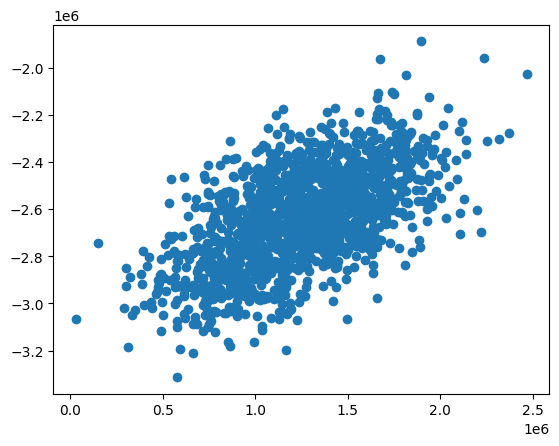

In [ ]:
#  visualisatione de nos

plt.scatter( y_test, y_pred)

In [ ]:
# mesure des erreurs

from sklearn.metrics import mean_absolute_error,  mean_squared_error, r2_score

In [ ]:
MAE = mean_absolute_error(y_test, y_pred )
MAE

3875147.2718050866

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
MSE

15101416778865.064

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

3886054.139981205

In [ ]:
r = r2_score(y_test, y_pred)
r

-115.75822193353831